In [1]:
#Import Necessary Libraries
import pandas as pd
from matplotlib import pyplot as plt
import random
import sys
sys.path.append("..") #give this script access to all modules in parent directory
import numpy as np
import os
import matplotlib.lines as mlines
from scipy.io import loadmat
import scipy
from scipy.stats import skew

C:\Users\jakes\AppData\Local\Temp\ipykernel_26020\2216688031.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
#data_dir = 'C:/Users/sidha/OneDrive/Sid Stuff/PROJECTS/iMEDS Design Team/Data Analysis/PedAccel/data_analysis/PythonPipeline/PatientData'
data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData'
window_size = 100 #100 is 1 second worth of time
lead_time = 10
slice_size_min = 15
sr = .5

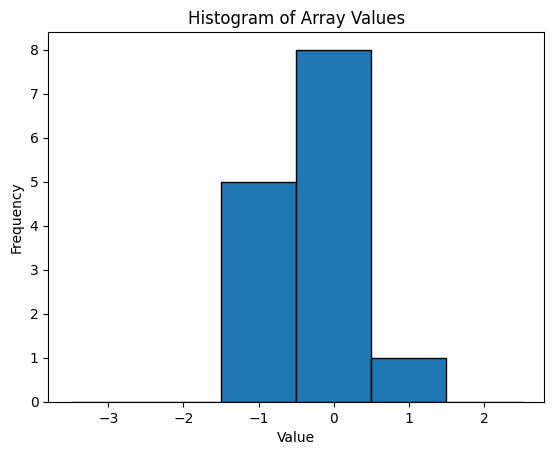

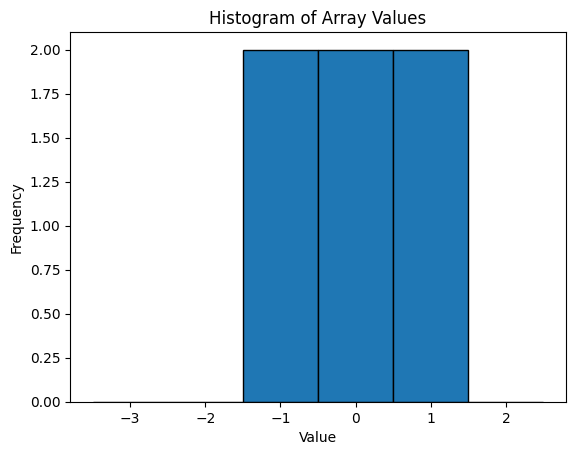

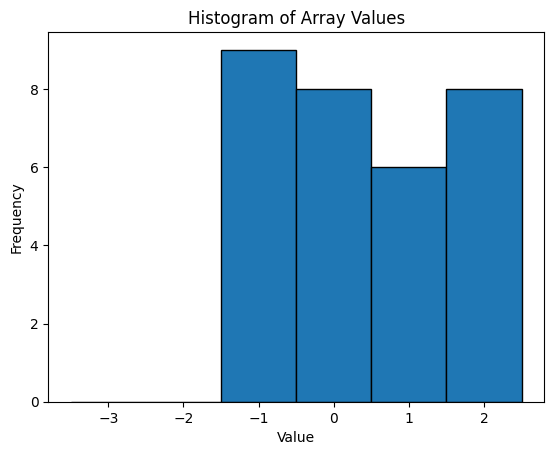

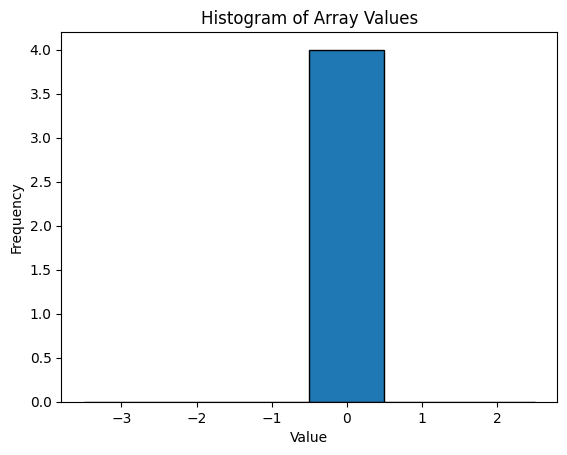

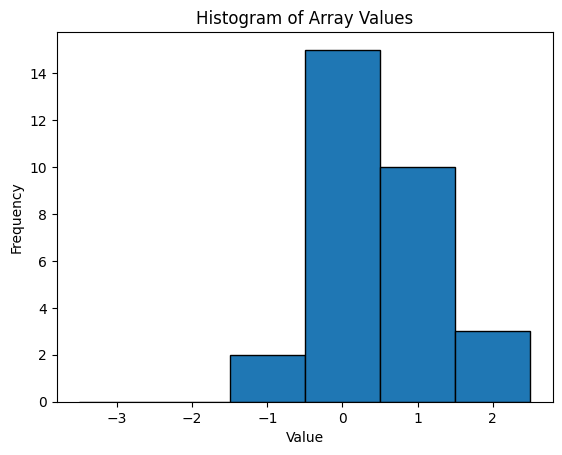

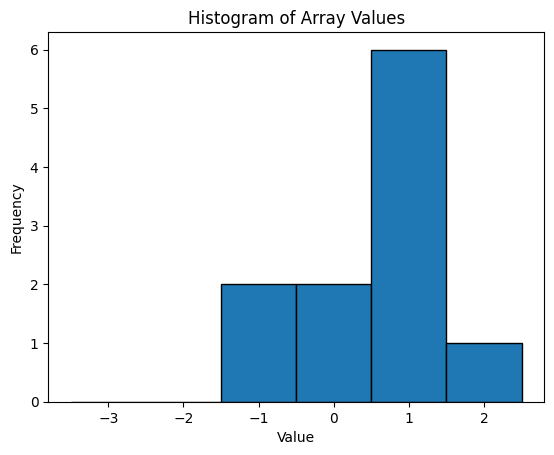

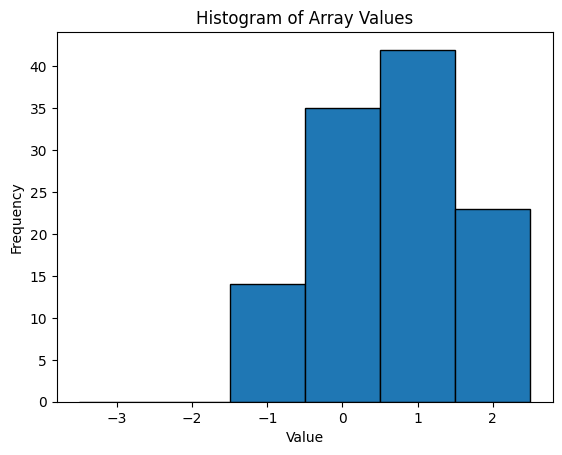

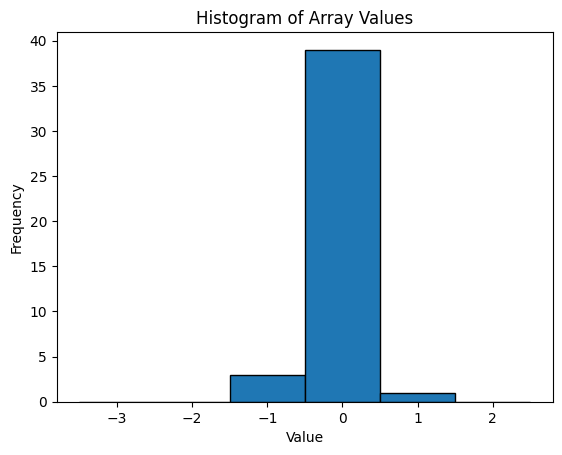

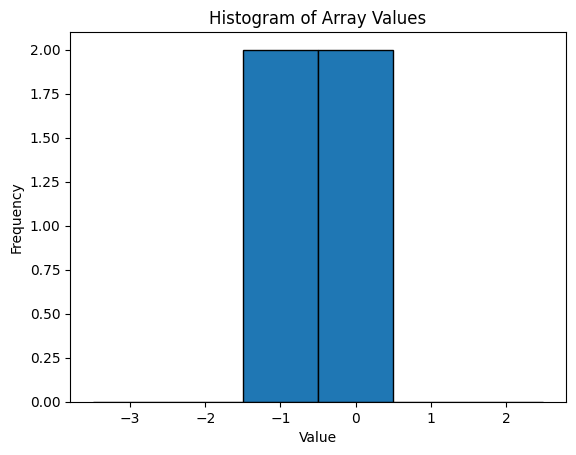

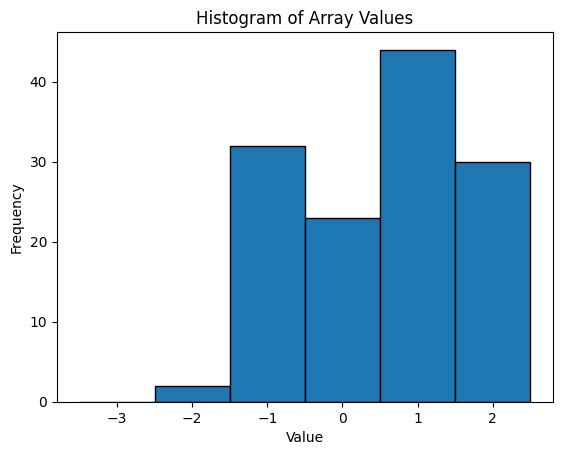

Patients with -2 or 2 are ['Patient13', 'Patient2', 'Patient3', 'Patient4', 'Patient9']
The number of -2 SBS scores in all data is 2
The number of 2 SBS scores in all data is 65
The total number of Patient SBS scores is 388


In [13]:
#There is no error handling in place, the .mat file must exist
count2 = 0
countneg2 = 0
total_count = 0

patients_to_look_at = []

for patient in os.listdir(data_dir):
    # filter out non-directories
    patient_dir = os.path.join(data_dir, patient)
    if os.path.isdir(patient_dir):
        data_filepath_vitals = os.path.join(patient_dir, f'{patient}_SICKBAY_{slice_size_min - lead_time}MIN_{lead_time}MIN.mat')
        
        vitals_data = loadmat(data_filepath_vitals)
        vitals_SBS = vitals_data['sbs'].flatten()

        if(2 in vitals_SBS or -2 in vitals_SBS):
            patients_to_look_at.append(patient)

        counts, bin_edges = np.histogram(vitals_SBS, bins=[-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5])

        countneg2+=counts[1]
        count2+=counts[-1]
        total_count+=len(vitals_SBS)

        # Create a histogram
        plt.hist(vitals_SBS, bins=[-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5], edgecolor='black', align='mid')

        # Set the title and labels
        plt.title('Histogram of Array Values')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

        # Display the histogram
        plt.show()
print(f'Patients with -2 or 2 are {patients_to_look_at}')
print(f'The number of -2 SBS scores in all data is {countneg2}')
print(f'The number of 2 SBS scores in all data is {count2}')
print(f'The total number of Patient SBS scores is {total_count}')

    

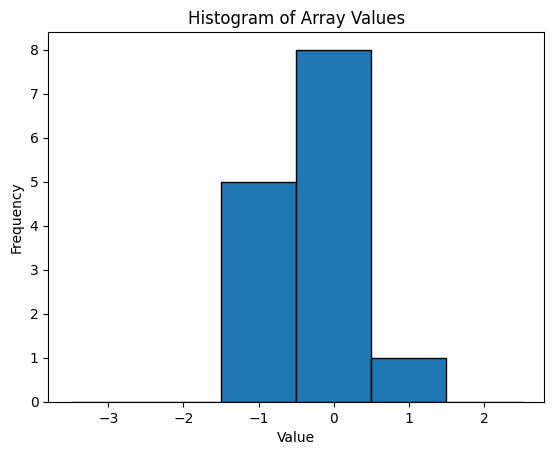

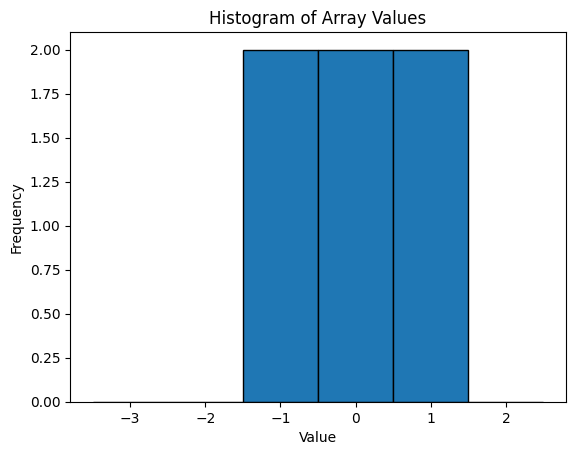

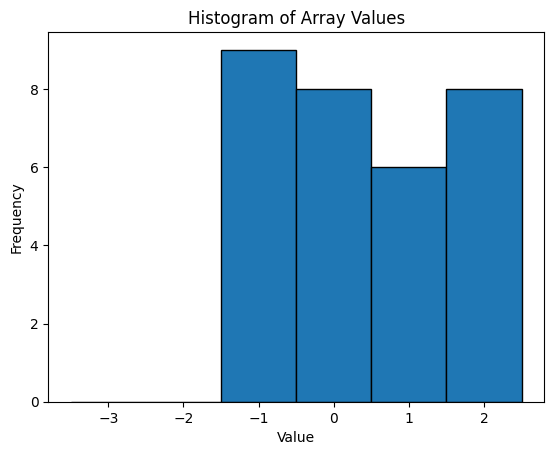

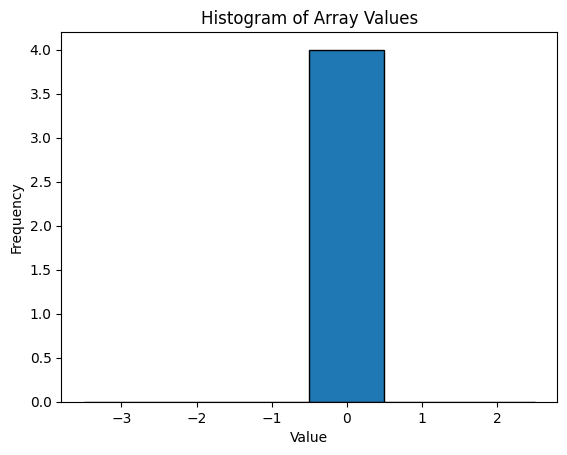

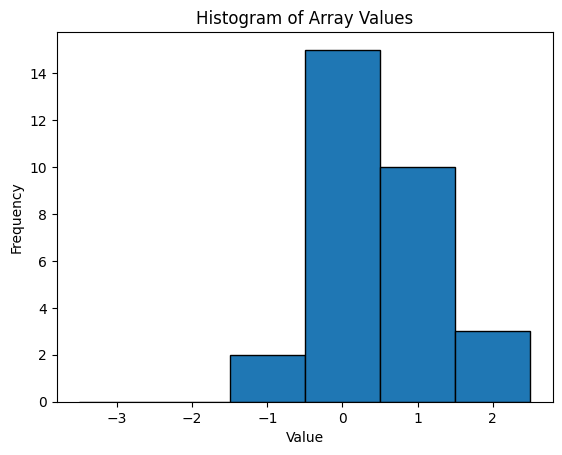

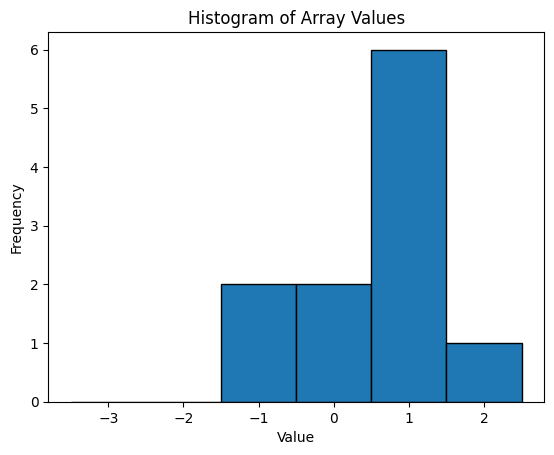

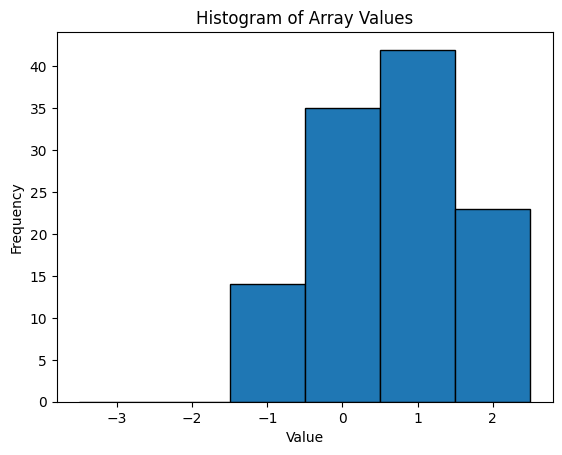

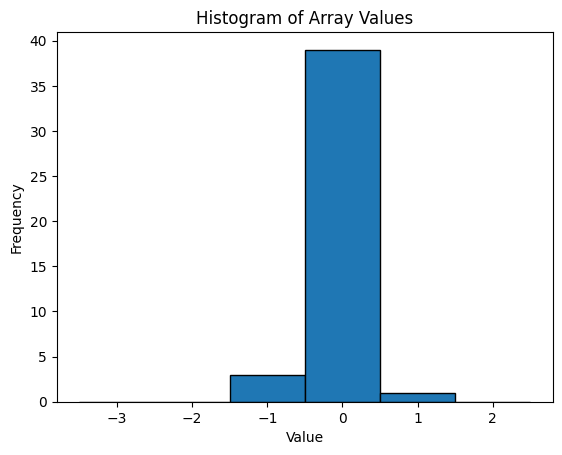

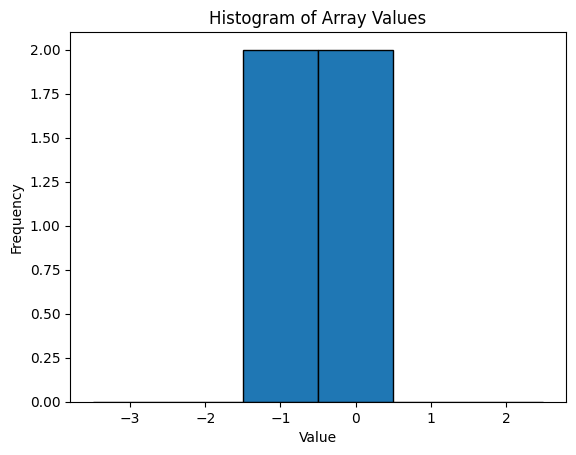

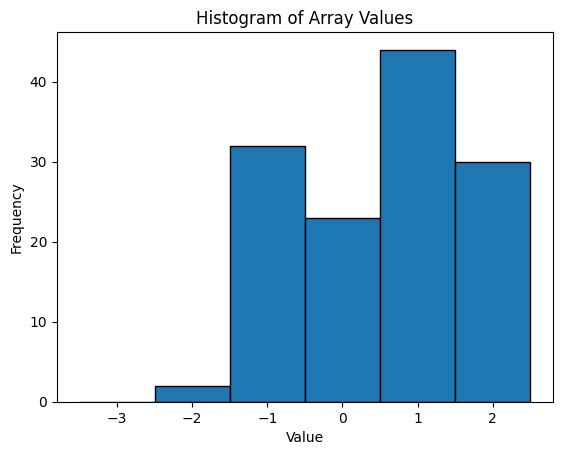

Patients with -2 or 2 are ['Patient13', 'Patient2', 'Patient3', 'Patient4', 'Patient9']
The number of -2 SBS scores in all data is 2
The number of 2 SBS scores in all data is 65
The total number of Patient SBS scores is 388


In [ ]:
#There is no error handling in place, the .mat file must exist
count2 = 0
countneg2 = 0
total_count = 0

patients_to_look_at = []

for patient in os.listdir(data_dir):
    # filter out non-directories
    patient_dir = os.path.join(data_dir, patient)
    if os.path.isdir(patient_dir):
        data_filepath_vitals = os.path.join(patient_dir, f'{patient}_SICKBAY_{slice_size_min - lead_time}MIN_{lead_time}MIN.mat')
        
        vitals_data = loadmat(data_filepath_vitals)
        vitals_SBS = vitals_data['sbs'].flatten()

        if(2 in vitals_SBS or -2 in vitals_SBS):
            patients_to_look_at.append(patient)

        counts, bin_edges = np.histogram(vitals_SBS, bins=[-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5])

        countneg2+=counts[1]
        count2+=counts[-1]
        total_count+=len(vitals_SBS)

        # Create a histogram
        plt.hist(vitals_SBS, bins=[-3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5], edgecolor='black', align='mid')

        # Set the title and labels
        plt.title('Histogram of Array Values')
        plt.xlabel('Value')
        plt.ylabel('Frequency')

        # Display the histogram
        plt.show()
        
print(f'Patients with -2 or 2 are {patients_to_look_at}')
print(f'The number of -2 SBS scores in all data is {countneg2}')
print(f'The number of 2 SBS scores in all data is {count2}')
print(f'The total number of Patient SBS scores is {total_count}')

    